In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_latency_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'time=\d+\.\d+'
        matches = re.findall(regex, content)
        latency_values = [float(match.split('=')[1]) for match in matches]
        return latency_values

results_file = 'output_with.txt'
latency_values = extract_latency_values(results_file)

# Divide the latency values into groups based on the number of tests
num_tests = 10
group_size = len(latency_values) // num_tests
latency_groups = [latency_values[i:i + group_size] for i in range(0, len(latency_values), group_size)]




In [3]:
df = pd.DataFrame(latency_groups).T
df.columns = [f'Test {i + 1}' for i in range(num_tests)]

df

,Test 1,Test 2,Test 3,Test 4,Test 5,Test 6,Test 7,Test 8,Test 9,Test 10
0,0.640,1.160,0.669,0.686,0.735,0.645,1.060,0.638,0.698,0.598
1,0.638,0.825,0.663,0.650,0.669,0.627,0.637,0.708,0.672,0.625
2,0.709,0.639,0.668,0.679,0.593,0.748,0.631,0.691,0.660,0.660
3,0.892,0.683,0.621,0.660,0.800,0.795,0.746,0.649,0.618,0.624
4,0.712,0.675,0.599,0.702,0.737,0.688,0.669,0.679,0.684,0.691
5,0.643,0.712,0.609,0.658,0.687,0.728,0.726,0.694,0.756,0.690
6,0.670,0.647,0.653,0.705,0.700,0.675,0.662,1.223,0.626,0.628
7,0.711,0.702,0.646,0.771,0.649,0.742,0.661,0.617,0.650,0.722
8,0.710,0.661,0.758,0.696,0.723,2.092,0.668,0.736,1.037,0.717
9,0.749,0.661,0.641,0.725,0.663,0.701,0.693,0.676,0.626,0.833


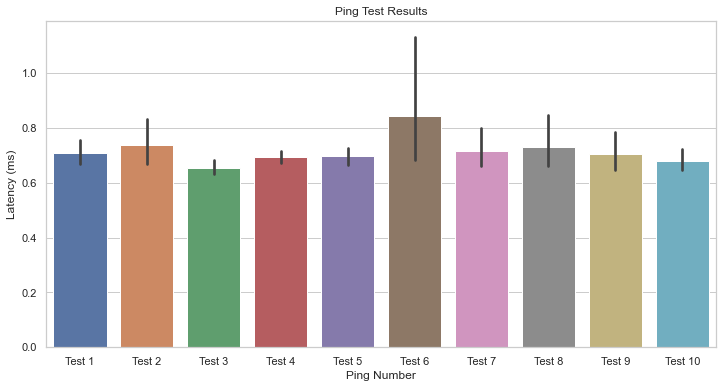

In [4]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df)
ax.set(xlabel='Ping Number', ylabel='Latency (ms)', title='Ping Test Results')
plt.savefig('ping_test_barchart.png')

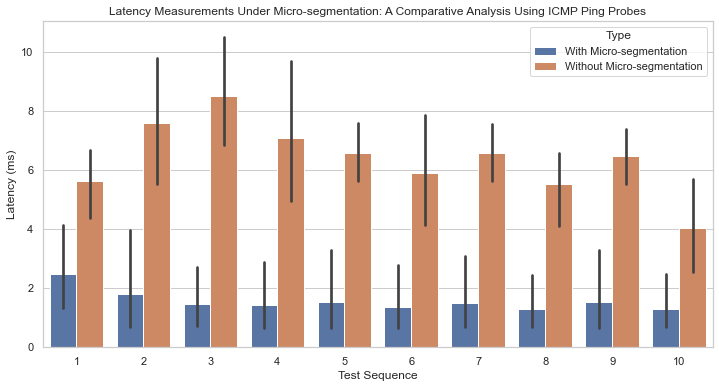

In [8]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_latency_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'time=\d+\.\d+'
        matches = re.findall(regex, content)
        latency_values = [float(match.split('=')[1]) for match in matches]
        return latency_values

output_with = 'ping_test_results_with_policies.txt'
output_without = 'ping_test_results_without_policies.txt'
latency_with = extract_latency_values(output_with)
latency_without = extract_latency_values(output_without)

num_tests = 10
group_size = len(latency_with) // num_tests

df_with = pd.DataFrame(latency_with, columns=['Latency (ms)'])
df_with['Type'] = 'With Micro-segmentation'

df_without = pd.DataFrame(latency_without, columns=['Latency (ms)'])
df_without['Type'] = 'Without Micro-segmentation'

df = pd.concat([df_with, df_without])

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x=df.index % group_size + 1, y='Latency (ms)', hue='Type')
ax.set(xlabel='Test Sequence', ylabel='Latency (ms)', title='Latency Measurements Under Micro-segmentation: A Comparative Analysis Using ICMP Ping Probes')
plt.savefig('ping_tests_separate.pdf')


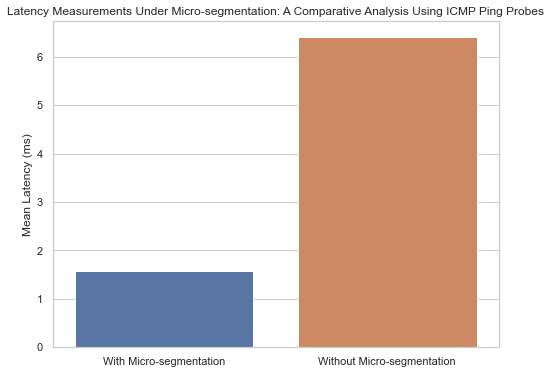

In [7]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_latency_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'time=\d+\.\d+'
        matches = re.findall(regex, content)
        latency_values = [float(match.split('=')[1]) for match in matches]
        return latency_values

output_with = 'ping_test_results_with_policies.txt'
output_without = 'ping_test_results_without_policies.txt'
latency_with = extract_latency_values(output_with)
latency_without = extract_latency_values(output_without)

df = pd.DataFrame({'With Micro-segmentation': [sum(latency_with) / len(latency_with)],
                   'Without Micro-segmentation': [sum(latency_without) / len(latency_without)]})

sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df)
ax.set(ylabel='Mean Latency (ms)', title='Latency Measurements Under Micro-segmentation: A Comparative Analysis Using ICMP Ping Probes')
plt.savefig('ping_tests_combined.pdf')
